In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
data_df = pd.read_csv("Automobile_data.csv")

In [3]:
data_df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

#### So we have some numic columns their type is object, like: (normalized-losses, num-of-cylinders, bore, stroke, horsepower, peak-rpm, price)
#### And there's null values called "?" !
### let's see how many of data are null first ...

In [5]:
# Replacing "?" with None to define null values
data_df.replace(["?"],[np.NaN],inplace=True)

# now let's see the null sum
null_data = data_df.isnull()
null_data.sum()[null_data.sum() != 0]

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

In [6]:
data_df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,NaN


### "normalized-losses" have the most null data!
### Let's try to understand data by discribtion ...

In [7]:
round(data_df.describe())

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0
mean,1.0,99.0,174.0,66.0,54.0,2556.0,127.0,10.0,25.0,31.0
std,1.0,6.0,12.0,2.0,2.0,521.0,42.0,4.0,7.0,7.0
min,-2.0,87.0,141.0,60.0,48.0,1488.0,61.0,7.0,13.0,16.0
25%,0.0,94.0,166.0,64.0,52.0,2145.0,97.0,9.0,19.0,25.0
50%,1.0,97.0,173.0,66.0,54.0,2414.0,120.0,9.0,24.0,30.0
75%,2.0,102.0,183.0,67.0,56.0,2935.0,141.0,9.0,30.0,34.0
max,3.0,121.0,208.0,72.0,60.0,4066.0,326.0,23.0,49.0,54.0


### Let's classify our columns into Numric & Catagorical Columns ...

In [8]:
# see what columns have more unique values
data_df.nunique()

symboling              6
normalized-losses     51
make                  22
fuel-type              2
aspiration             2
num-of-doors           2
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  38
stroke                36
compression-ratio     32
horsepower            59
peak-rpm              23
city-mpg              29
highway-mpg           30
price                186
dtype: int64

In [9]:
max_unique_values = 23

num_cols = data_df.nunique() > max_unique_values
numeric_columns = num_cols[num_cols==True].index

cat_cols = data_df.nunique() < max_unique_values
catagorical_columns = cat_cols[cat_cols==True].index

print('Numeric Columns : ' + str(list(numeric_columns)))
print('\n')
print('Catagorical Columns : ' + str(list(catagorical_columns)))

Numeric Columns : ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'city-mpg', 'highway-mpg', 'price']


Catagorical Columns : ['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


### Now let's plot columns and get some simple insights ...

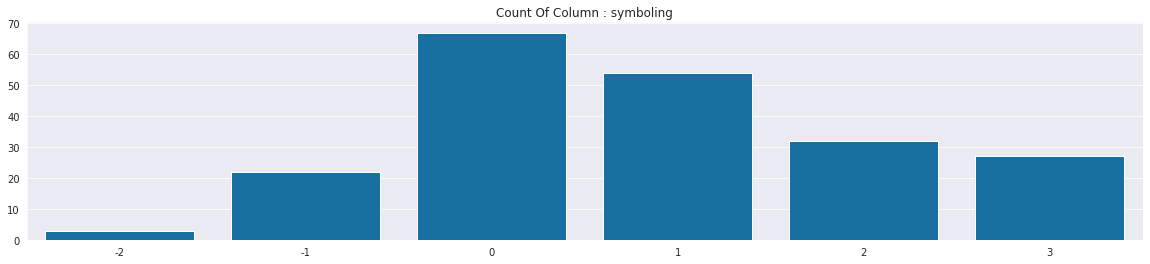

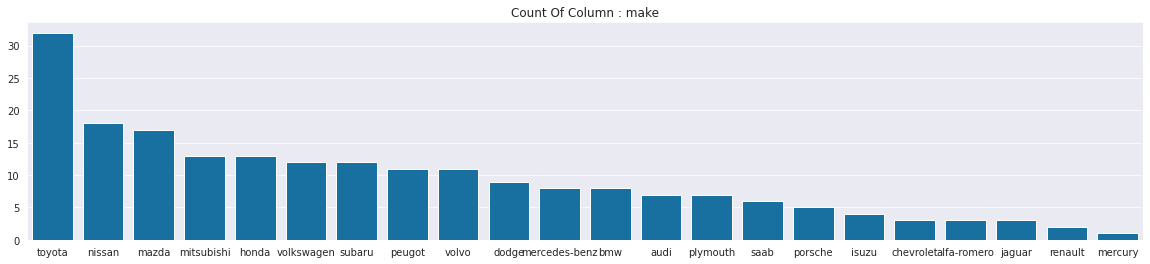

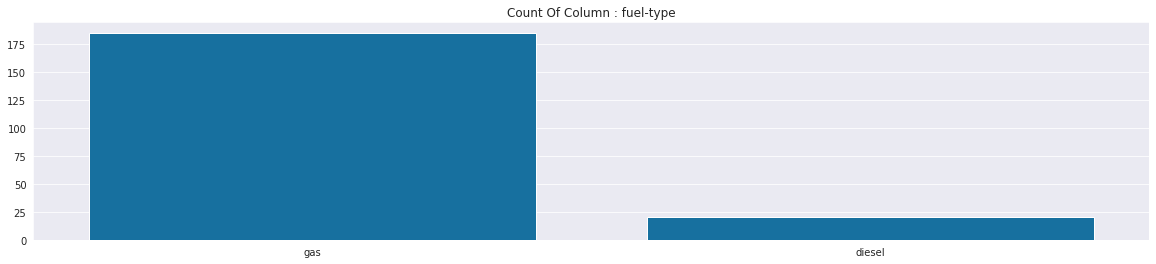

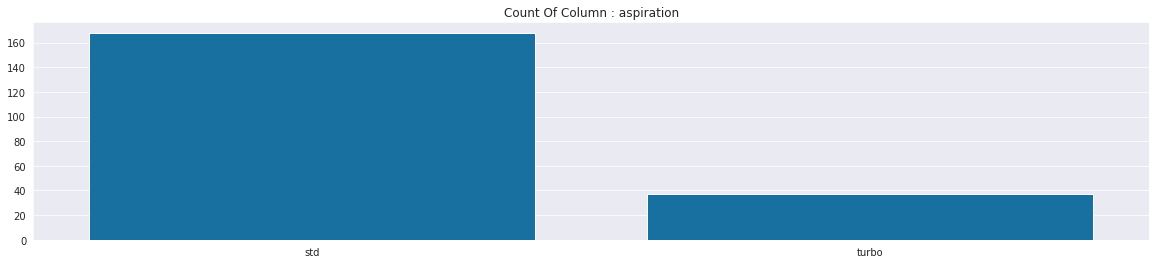

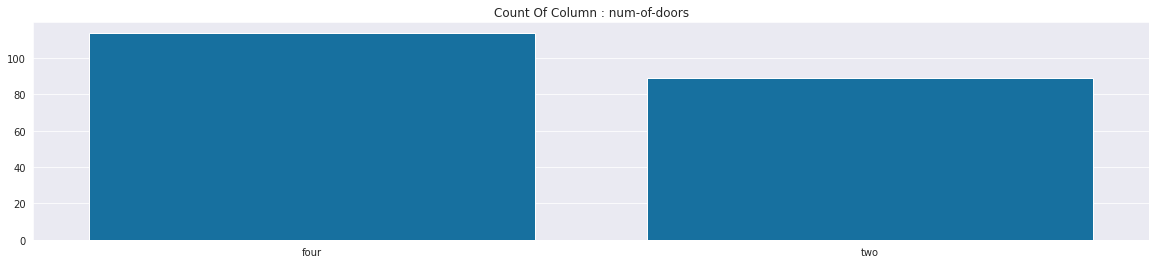

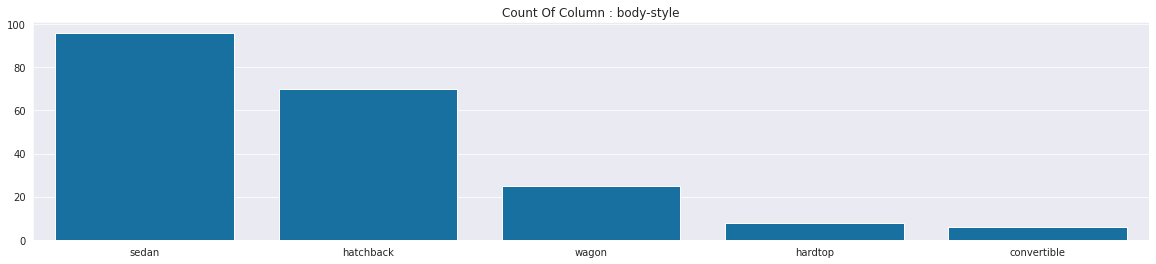

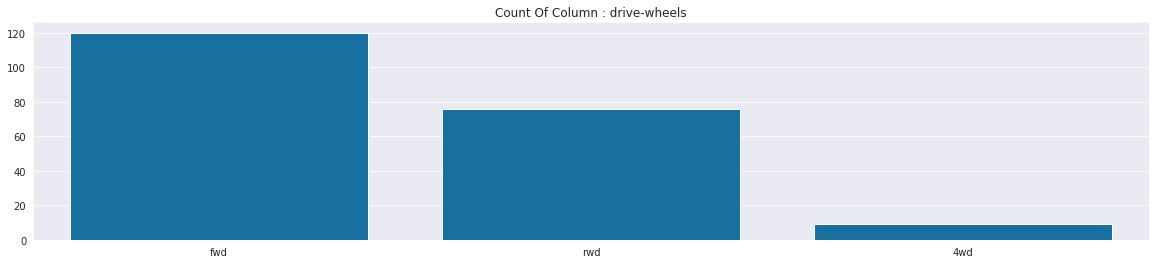

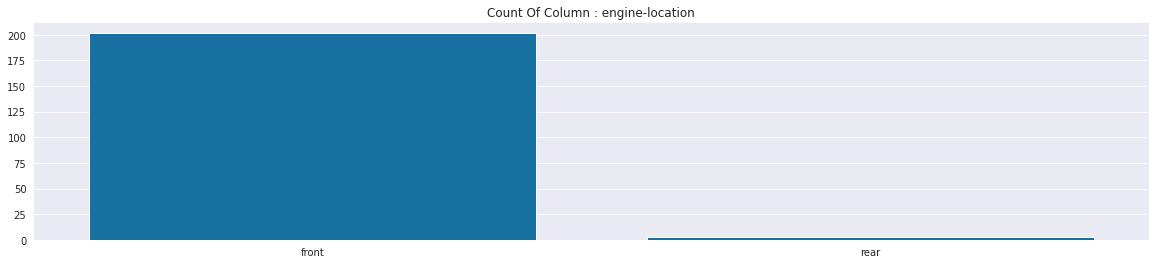

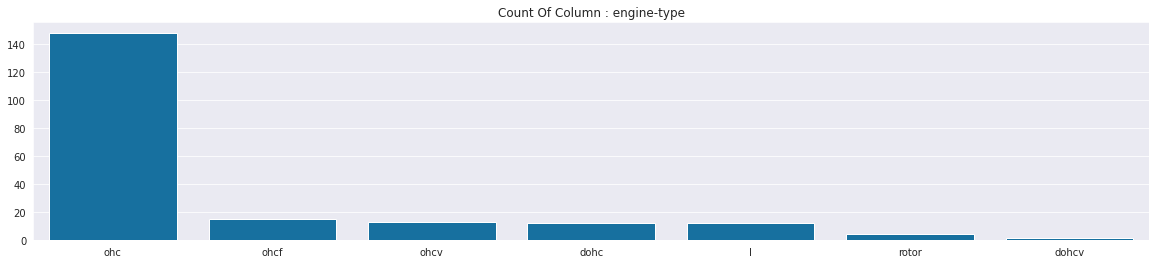

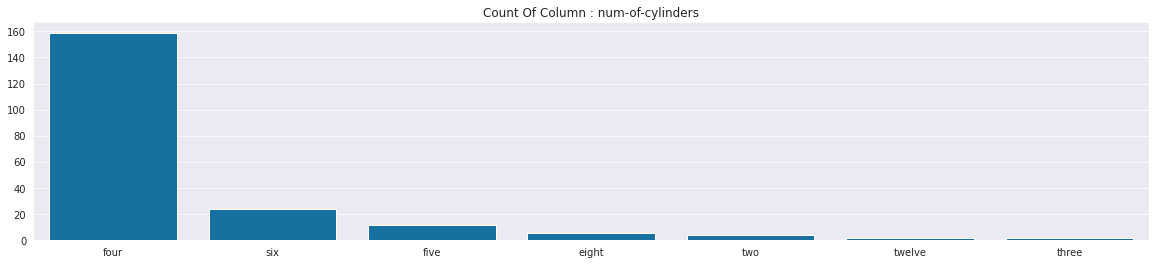

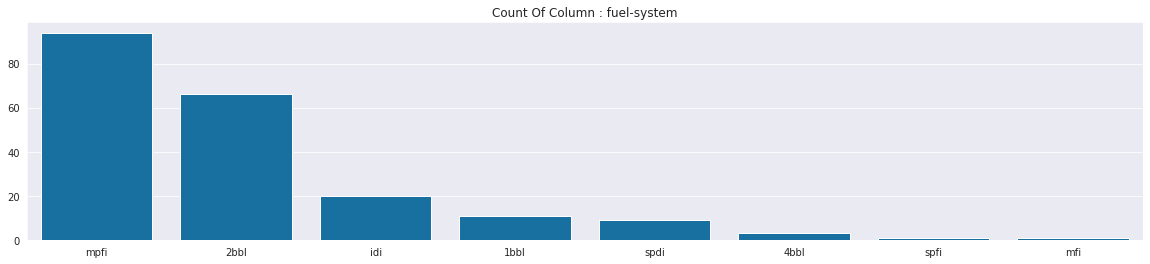

In [10]:
for col in catagorical_columns :
    col_index = catagorical_columns.get_loc(col)
    fig = plt.figure(figsize=(20,4))
    data = data_df[col].value_counts()
    sns.barplot(x=data.index,
                y=data.values,
                color='#0077b6')
    plt.title("Count Of Column : " + col)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


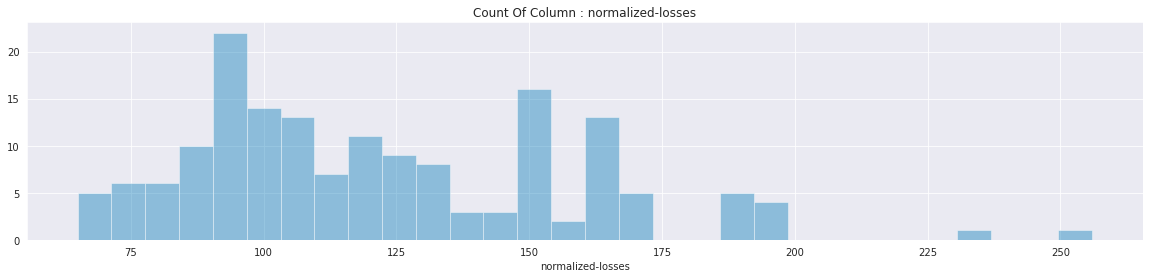

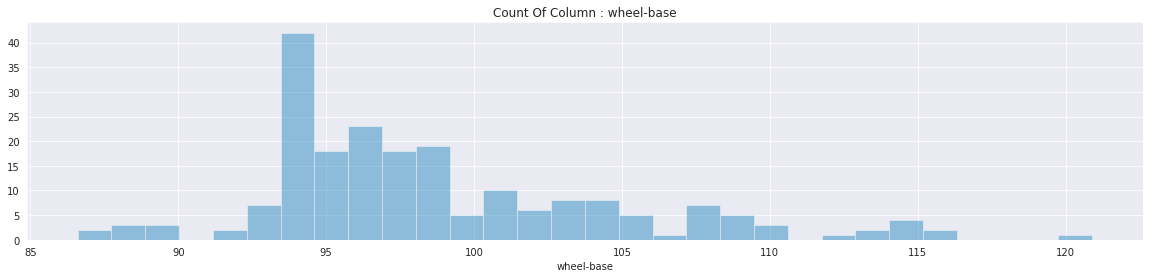

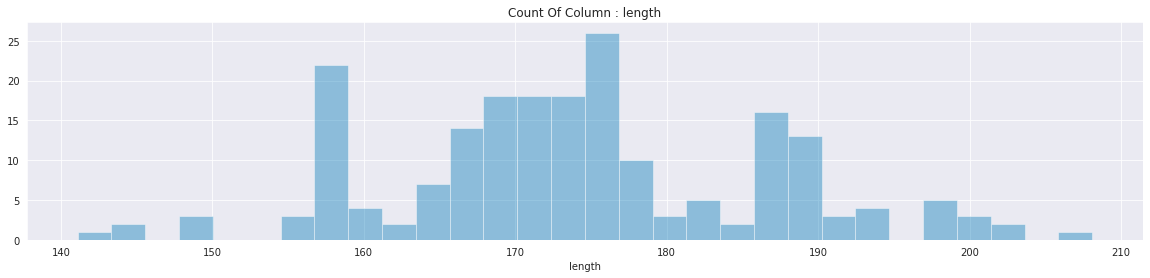

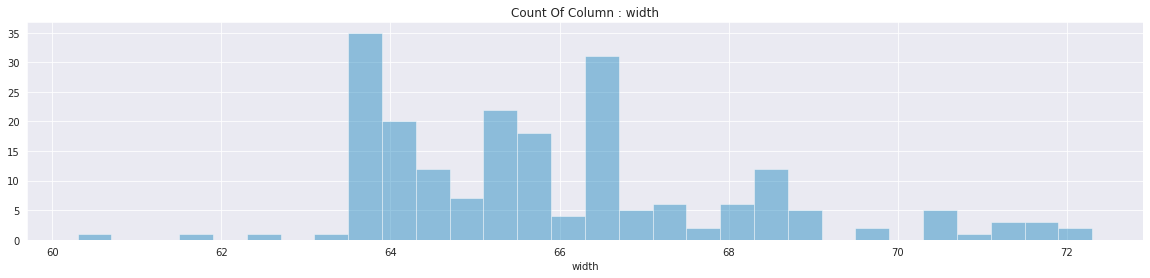

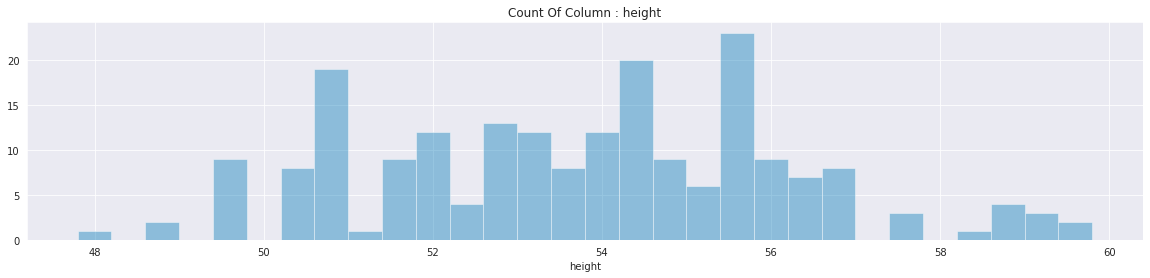

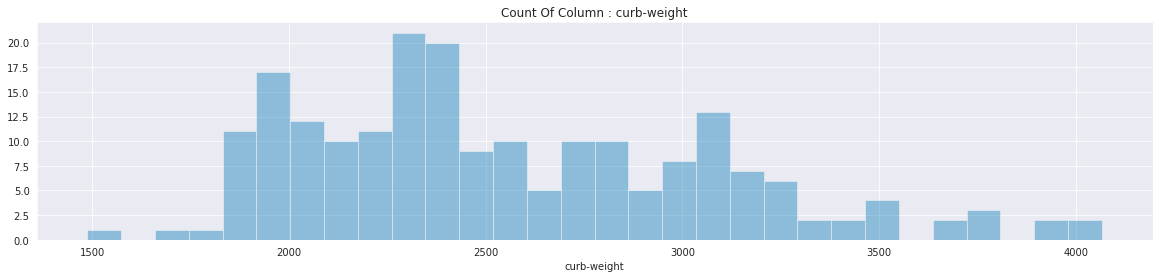

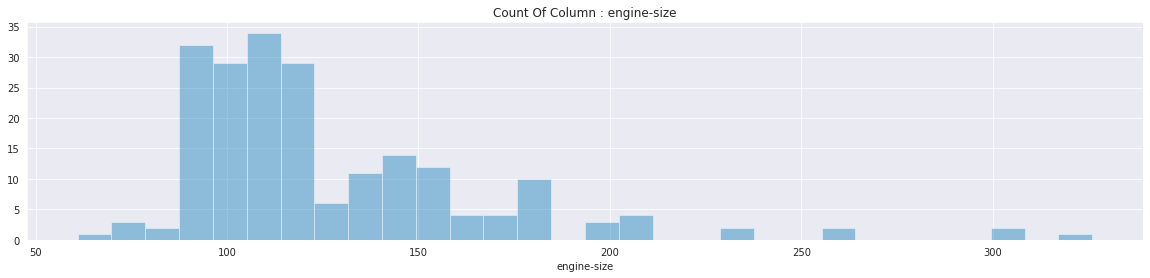

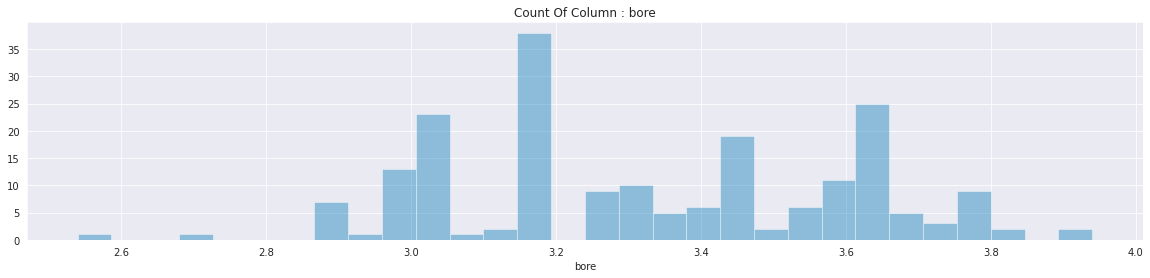

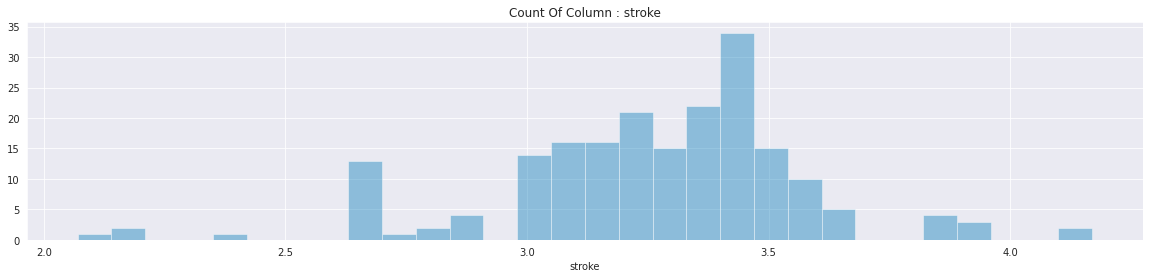

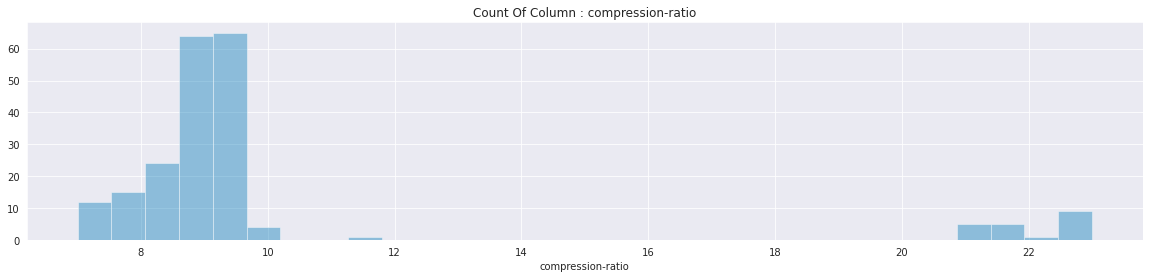

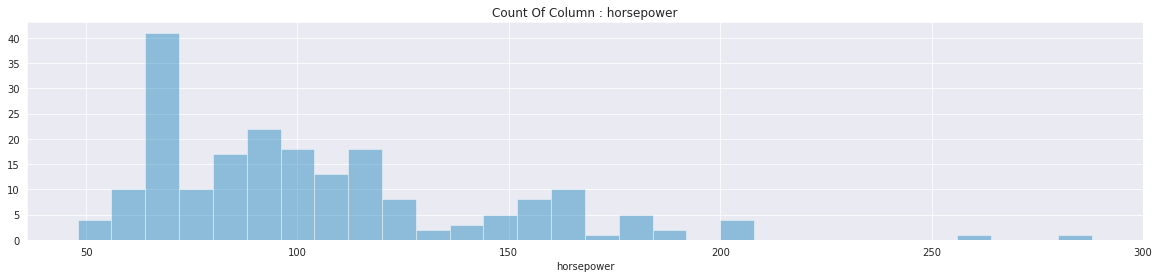

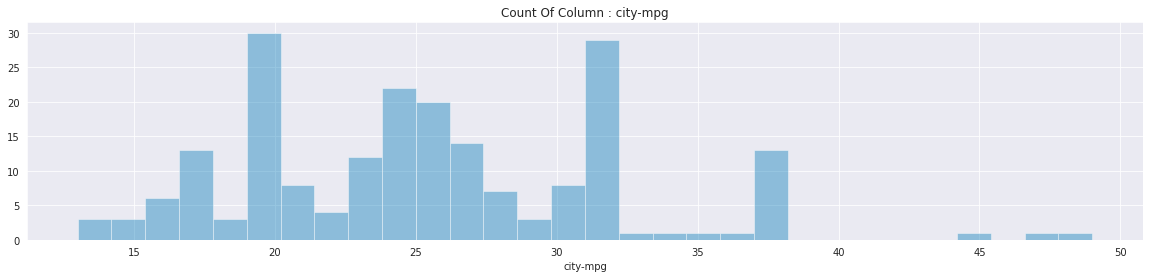

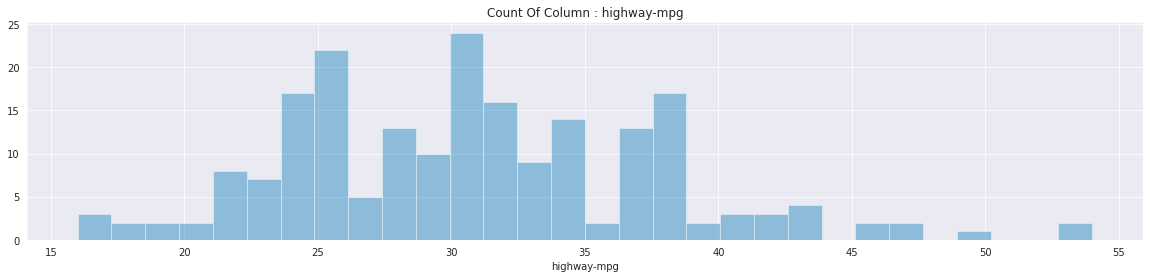

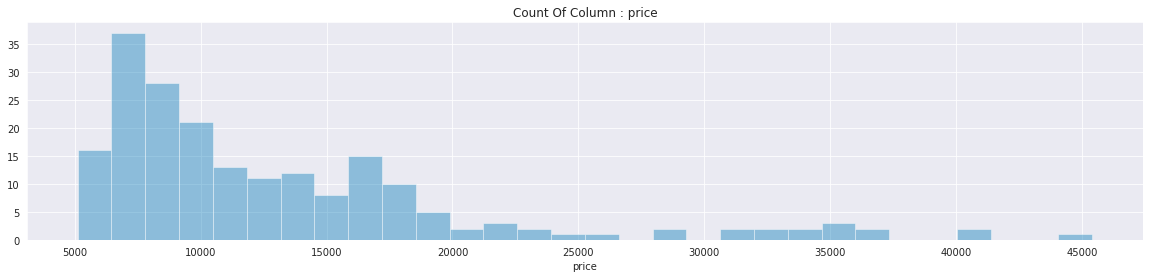

In [11]:
for col in numeric_columns :
    col_index = numeric_columns.get_loc(col)
    fig = plt.figure(figsize=(20,4))
    data = data_df[col].value_counts()
    sns.distplot(a=data_df[col].dropna(),
             hist=True, kde=False, rug=False, bins=30, color="#0077b6")
    plt.title("Count Of Column : " + col)

### What do we get from graphs :
* Toyota is the most selling company in the market
* Almost all cars work with Gas
* Almost all cars have the engine in the front side
* most cars have the engine-type of ohc
* most cars have 4 Cylinders
* most cars have a horsepower between 60 & 160
* most cars prices lies in range (5000 to 25000)

###  Now let's convert numric values to their right type ...

In [12]:
data_df[['normalized-losses', 'bore', 'stroke',
         'horsepower', 'peak-rpm', 'price']] = data_df[['normalized-losses', 'bore', 'stroke',
                                                        'horsepower', 'peak-rpm', 'price']].apply(pd.to_numeric)

In [13]:
# let's check them
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Now cleaning Time :

In [14]:
# replace null data with valiud values
data_df['normalized-losses'].replace(np.nan, data_df['normalized-losses'].mean(), inplace=True)
data_df['num-of-doors'].replace(np.nan, 'four', inplace=True)
data_df['bore'].replace(np.nan, data_df['bore'].mean(), inplace=True)
data_df['stroke'].replace(np.nan, data_df['stroke'].mean(), inplace=True)
data_df['horsepower'].replace(np.nan, data_df['horsepower'].mean(), inplace=True)
data_df['peak-rpm'].replace(np.nan, data_df['peak-rpm'].mean(), inplace=True)
data_df['price'].replace(np.nan, data_df['price'].mean(), inplace=True)

In [15]:
# give it a check
data_df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [16]:
data_df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.000000
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.000000
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.000000
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.000000
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.000000
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.000000
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.000000
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.000000
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.000000
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,13207.129353


In [17]:
data_df["price"] = round(data_df["price"])

In [18]:
data_df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,122.0,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,122.0,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,122.0,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,13207.0


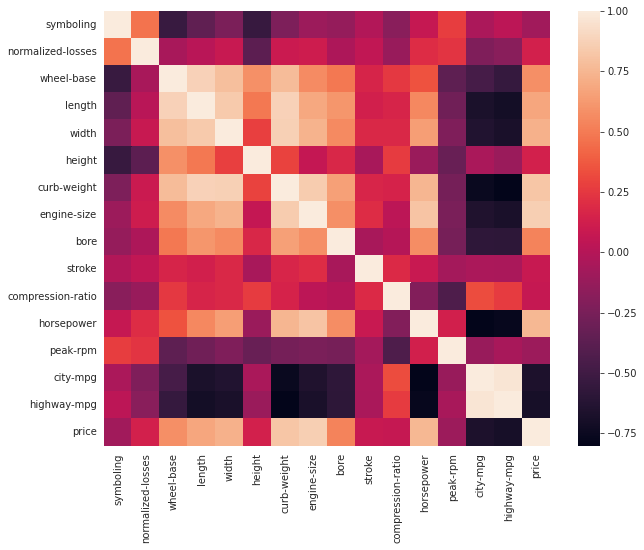

In [19]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(data_df.corr())

#### So we have some correlations.

### Let's make some questions :
##### 1- Which companies make higher horsepower or peak-rpm or highway-mpg ?
##### 2- Does weight affect highway-mpg or horsepower ?
##### 3- What companies make most expensive cars ?
##### 4- Does price depend on something ?

#### 1st Question : Which companies make higher horsepower or peak-rpm or highway-mpg ?

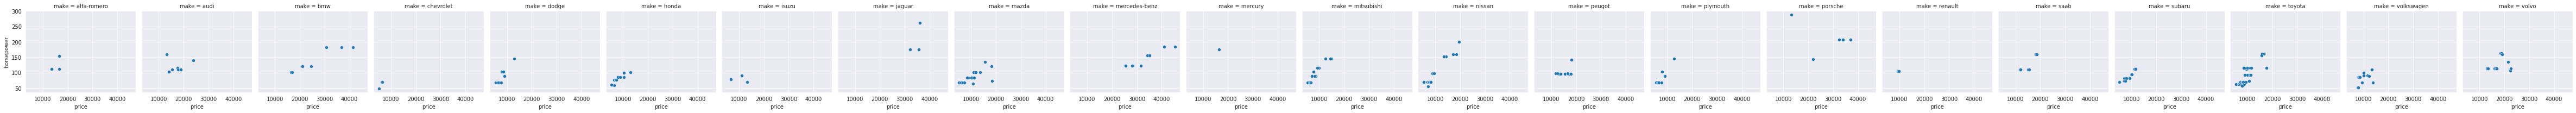

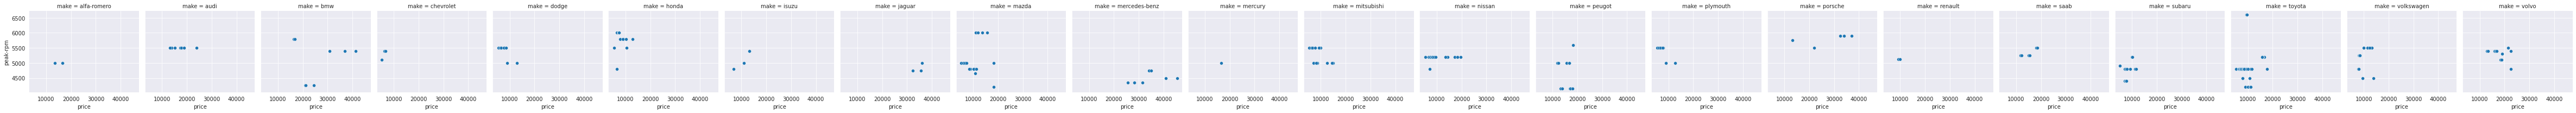

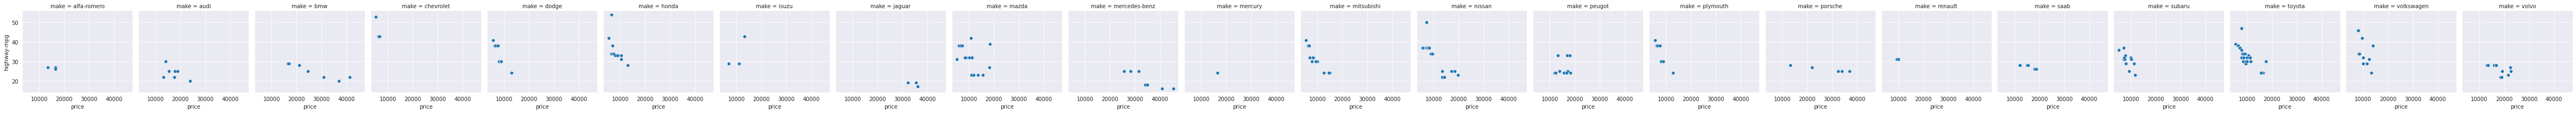

In [20]:
for col in ['horsepower','peak-rpm','highway-mpg'] :
  g = sns.FacetGrid(data= data_df, col= 'make')
  g.map(sns.scatterplot, 'price', col)

#### We will notice somethings :
- BMW & Mercedes-benz make some expensive cars which are not faster !
- Chevrolet & Honda make cheap cars with low speed but more powerful on the highway road.
- Jaguar & Porsche make the fastest cars.

In [21]:
# To ensure our results
data_df.sort_values('price', ascending=False).head(10)[['make', 'horsepower', 'price']]

,make,horsepower,price
74,mercedes-benz,184.0,45400.0
16,bmw,182.0,41315.0
73,mercedes-benz,184.0,40960.0
128,porsche,207.0,37028.0
17,bmw,182.0,36880.0
49,jaguar,262.0,36000.0
48,jaguar,176.0,35550.0
72,mercedes-benz,155.0,35056.0
71,mercedes-benz,155.0,34184.0
127,porsche,207.0,34028.0


##### So we were somekind of wrong with mercedes-benz and bmw !
##### And we were right with jaguar and porsche.

#### 2nd Question : Does weight affect highway-mpg or horsepower ?

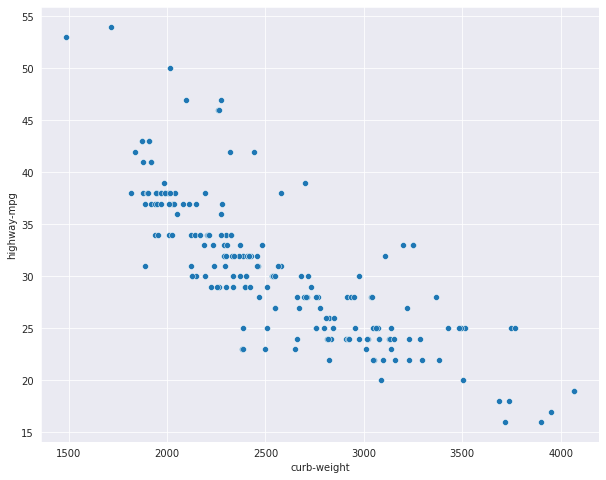

In [22]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data= data_df, x= data_df['curb-weight'], y=data_df['highway-mpg'])

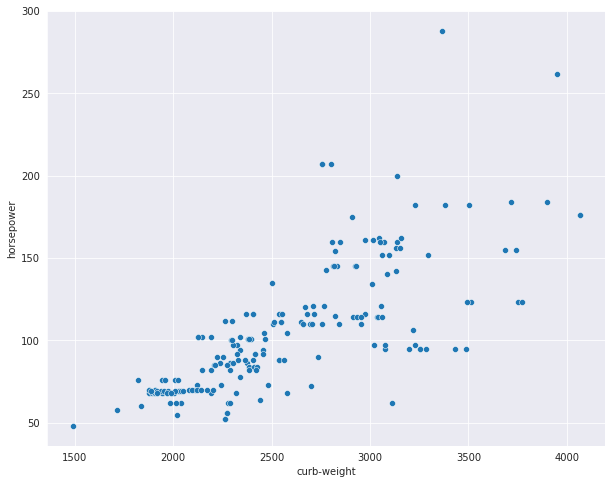

In [23]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(data= data_df, x= data_df['curb-weight'], y=data_df['horsepower'])

#### So we have 2 conclusions here :
##### 1- curb-weight is inversly propotional with highway-mpg. (more weight more gas consumption and less distance.)
##### 2- curb-weight is propotional with horsepower. (more weight more power the company design car to work with.)


### 3rd Question : What companies make most expensive cars ?

In [24]:
data_df.sort_values('price', ascending=False).head(10)[['make', 'price']].value_counts()

make           price  
porsche        37028.0    1
               34028.0    1
mercedes-benz  45400.0    1
               40960.0    1
               35056.0    1
               34184.0    1
jaguar         36000.0    1
               35550.0    1
bmw            41315.0    1
               36880.0    1
dtype: int64

#### So we have 4 companies make very expensive cars (Porcshe, Mercedes-Benz, Jaguar, BMW)

### 4th Question : Does price depend on something ?

In [25]:
data_df.corr()['price'].sort_values(ascending= False).drop('price').head(5)

engine-size    0.861752
curb-weight    0.820825
horsepower     0.757917
width          0.728699
length         0.682986
Name: price, dtype: float64

#### So somehow horsepower comes in the 3rd place in defining price,engine-size comes in the first place and curb-weight comes second.